In [1]:
import calc_rng_dmg # need to restart kernal if you change amt of resil
import pandas as pd
from concurrent.futures import ThreadPoolExecutor

df_input = []
df_input2 = []
for amt_resil in range(6):
    for amt_shirking_fort in range(6):
        for amt_aversion in range(6):
            if amt_shirking_fort + amt_aversion == 0 or (amt_shirking_fort + amt_resil >= 5 and amt_shirking_fort + amt_aversion <= 6): # want combined 5-6 EA/SF or non sf/ea for resil data
                for i in range(100000):
                    temp_list = calc_rng_dmg.calc_dmg("light_fs_vicious_fire_damage",amt_resil_ui=amt_resil,amt_shirking_ui=amt_shirking_fort,amt_aversion_ui=amt_aversion)
                    temp_list.append(amt_resil)
                    temp_list.append(amt_shirking_fort)
                    temp_list.append(amt_aversion)
                    df_input.append(temp_list)

df = pd.DataFrame(df_input,columns=["damage","base damage","crit","crit damage modifier","empower %","dmg absorbed","rend percentage","amt resil","amt shirking fort", "amt aversion"])

### Meta Gear Analysis

In [2]:
sf_df = df[(df['amt resil'] == 5) & (df['amt shirking fort'] == 5)]
ea_df = df[(df['amt resil'] == 5) & (df['amt aversion'] == 5)]
illegal_sf_df = df[(df['amt resil'] == 4) & (df['amt shirking fort'] == 5) & (df['amt aversion'] == 1)]
illegal_ea_df = df[(df['amt resil'] == 4) & (df['amt shirking fort'] == 1) & (df['amt aversion'] == 5)]

sf_df.sort_values(by='damage')

,damage,base damage,crit,crit damage modifier,empower %,dmg absorbed,rend percentage,amt resil,amt shirking fort,amt aversion
8043411,921,1738,False,1.38,0.81,0.85,0.77,5,5,1
8008724,927,1726,False,1.38,0.81,0.85,0.78,5,5,1
8070562,933,1738,False,1.38,0.82,0.85,0.77,5,5,1
7940222,941,1775,False,1.38,0.81,0.85,0.77,5,5,0
8078482,943,1801,False,1.38,0.80,0.85,0.77,5,5,1
...,...,...,...,...,...,...,...,...,...,...
7950151,3442,2512,True,1.38,1.30,0.85,1.24,5,5,0
7988544,3443,2512,True,1.38,1.29,0.85,1.25,5,5,0
7912704,3453,2500,True,1.38,1.30,0.85,1.25,5,5,0
7965260,3460,2525,True,1.38,1.30,0.85,1.24,5,5,0


In [3]:
print(f"sf mean: {sf_df['damage'].mean()} sf median: {sf_df['damage'].median()} standard deviation: {round(sf_df['damage'].std(),2)} max: {sf_df['damage'].max()}")
print(f"sf mean: {ea_df['damage'].mean()} sf median: {ea_df['damage'].median()} standard deviation: {round(ea_df['damage'].std(),2)} max: {ea_df['damage'].max()}")
print(f"sf mean: {illegal_sf_df['damage'].mean()} sf median: {illegal_sf_df['damage'].median()} standard deviation: {round(illegal_sf_df['damage'].std(),2)} max: {illegal_sf_df['damage'].max()}")
print(f"sf mean: {illegal_ea_df['damage'].mean()} sf median: {illegal_ea_df['damage'].median()} standard deviation: {round(illegal_ea_df['damage'].std(),2)} max: {illegal_ea_df['damage'].max()}")

sf mean: 1826.5827 sf median: 1782.0 standard deviation: 375.9 max: 3488
sf mean: 1702.16895 sf median: 1657.0 standard deviation: 356.81 max: 3151
sf mean: 1818.08787 sf median: 1769.0 standard deviation: 384.63 max: 3471
sf mean: 1707.44107 sf median: 1656.0 standard deviation: 369.01 max: 3202


[1.0731, 1.0, 1.0681, 1.0031]

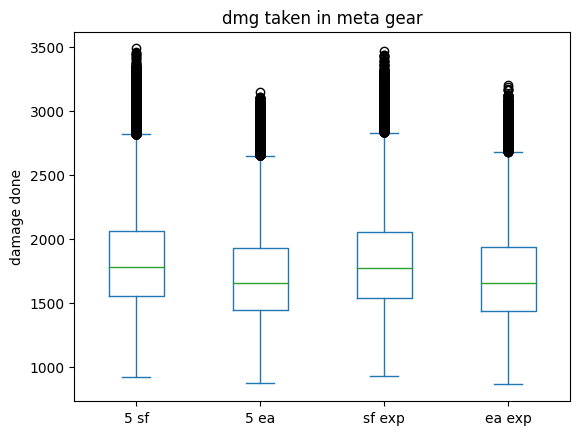

In [4]:
# List of the DataFrames
dataframes_list = [sf_df, ea_df, illegal_sf_df, illegal_ea_df]

# Extract the 'damage' column from each DataFrame and concatenate them into box_df
box_df = pd.concat([df['damage'].dropna() for df in dataframes_list], axis=1)
mean = [df['damage'].mean() for df in dataframes_list]

# Rename the columns in the new DataFrame
column_names = ['5 sf','5 ea','sf exp','ea exp']
box_df.columns = column_names

bplt = box_df.plot.box()
bplt.set_ylabel("damage done")
bplt.set_title("dmg taken in meta gear")

base_resil_dmg = min(mean)
mean_dmg_percent = [round(x/base_resil_dmg,4) for x in mean]
mean_dmg_percent


### Resil Analysis

In [5]:
r0df = df[(df['amt resil']==0) & (df['amt aversion']==0) & (df['amt shirking fort']==0)]
r1df = df[(df['amt resil']==1) & (df['amt aversion']==0) & (df['amt shirking fort']==0)]
r2df = df[(df['amt resil']==2) & (df['amt aversion']==0) & (df['amt shirking fort']==0)]
r3df = df[(df['amt resil']==3) & (df['amt aversion']==0) & (df['amt shirking fort']==0)]
r4df = df[(df['amt resil']==4) & (df['amt aversion']==0) & (df['amt shirking fort']==0)]
r5df = df[(df['amt resil']==5) & (df['amt aversion']==0) & (df['amt shirking fort']==0)]

In [6]:
print(f"0 resil mean: {r0df['damage'].mean()} sf median: {r0df['damage'].median()} standard deviation: {round(r0df['damage'].std(),2)} max: {r0df['damage'].max()}")
print(f"1 resil mean: {r1df['damage'].mean()} sf median: {r1df['damage'].median()} standard deviation: {round(r1df['damage'].std(),2)} max: {r1df['damage'].max()}")
print(f"2 resil mean: {r2df['damage'].mean()} sf median: {r2df['damage'].median()} standard deviation: {round(r2df['damage'].std(),2)} max: {r2df['damage'].max()}")
print(f"3 resil mean: {r3df['damage'].mean()} sf median: {r3df['damage'].median()} standard deviation: {round(r3df['damage'].std(),2)} max: {r3df['damage'].max()}")
print(f"4 resil mean: {r4df['damage'].mean()} sf median: {r4df['damage'].median()} standard deviation: {round(r4df['damage'].std(),2)} max: {r4df['damage'].max()}")
print(f"5 resil mean: {r5df['damage'].mean()} sf median: {r5df['damage'].median()} standard deviation: {round(r5df['damage'].std(),2)} max: {r5df['damage'].max()}")


0 resil mean: 2018.76676 sf median: 1937.0 standard deviation: 477.41 max: 3902
1 resil mean: 2005.58437 sf median: 1932.0 standard deviation: 462.17 max: 3815
2 resil mean: 1985.17178 sf median: 1919.0 standard deviation: 440.55 max: 3711
3 resil mean: 1967.04005 sf median: 1911.0 standard deviation: 422.62 max: 3632
4 resil mean: 1949.75118 sf median: 1899.0 standard deviation: 402.06 max: 3539
5 resil mean: 1935.88781 sf median: 1890.0 standard deviation: 390.41 max: 3488


[1.0249, 1.0222, 1.0153, 1.0111, 1.0048, 1.0]

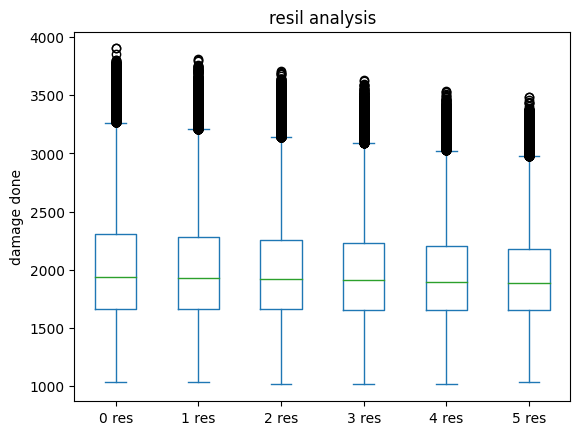

In [7]:
# List of the DataFrames
dataframes_list = [r0df,r1df,r2df,r3df,r4df,r5df]

# Extract the 'damage' column from each DataFrame and concatenate them into box_df
box_df = pd.concat([df['damage'].dropna() for df in dataframes_list], axis=1)
median = [df['damage'].median() for df in dataframes_list]

# Rename the columns in the new DataFrame
column_names = ['0 res','1 res','2 res','3 res','4 res','5 res']
box_df.columns = column_names

bplt = box_df.plot.box()
bplt.set_ylabel("damage done")
bplt.set_title("resil analysis")

base_resil_dmg = min(median)
median_dmg_percent = [round(x/base_resil_dmg,4) for x in median]
median_dmg_percent

# r1df.sort_values(by='damage')

### attunement vs shirking analysis

In [8]:
def get_class_data(nw_class,data_points):
    df_input = [None]*data_points
    for i in range(data_points):
        temp_list = calc_rng_dmg.calc_dmg(nw_class,amt_resil_ui=5,amt_shirking_ui=0,amt_aversion_ui=0)
        df_input[i] = temp_list
    return df_input

shirk = get_class_data("med_bruiser_wh_shirk",100000)
attunement = get_class_data("med_bruiser_wh_attunement",100000)

df_shirk = pd.DataFrame(shirk,columns=["damage","base damage","crit","crit damage modifier","empower %","dmg absorbed","rend percentage"])
df_attunement = pd.DataFrame(attunement,columns=["damage","base damage","crit","crit damage modifier","empower %","dmg absorbed","rend percentage"])

In [9]:
print(f"shirking mean: {df_shirk['damage'].mean()} sf median: {df_shirk['damage'].median()} standard deviation: {round(df_shirk['damage'].std(),2)} max: {df_shirk['damage'].max()}")
print(f"attunement mean: {df_attunement['damage'].mean()} sf median: {df_attunement['damage'].median()} standard deviation: {round(df_attunement['damage'].std(),2)} max: {df_attunement['damage'].max()}")

shirking mean: 2418.96029 sf median: 2389.0 standard deviation: 550.88 max: 4560
attunement mean: 2226.62946 sf median: 2232.0 standard deviation: 491.88 max: 3620


[1.0703, 1.0]

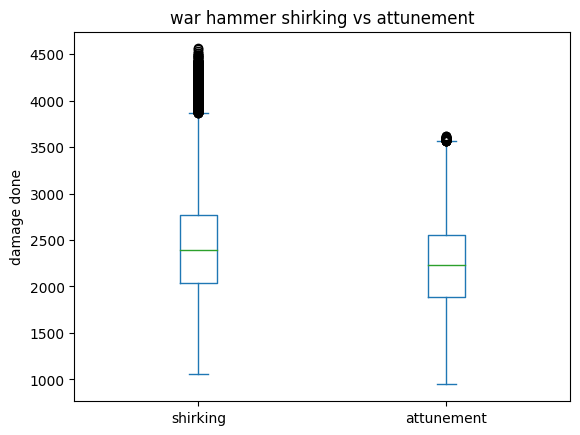

In [10]:
# List of the DataFrames
dataframes_list = [df_shirk,df_attunement]

# Extract the 'damage' column from each DataFrame and concatenate them into box_df
box_df = pd.concat([df['damage'].dropna() for df in dataframes_list], axis=1)
median = [df['damage'].median() for df in dataframes_list]

# Rename the columns in the new DataFrame
column_names = ['shirking','attunement']
box_df.columns = column_names

bplt = box_df.plot.box()
bplt.set_ylabel("damage done")
bplt.set_title("war hammer shirking vs attunement")

base_resil_dmg = min(median)
median_dmg_percent = [round(x/base_resil_dmg,4) for x in median]
median_dmg_percent

In [20]:
import calc_rng_dmg # need to restart kernal if you change amt of resil
import pandas as pd

def get_class_data(nw_class,data_points):
    df_input = [None]*data_points
    for i in range(data_points):
        temp_list = calc_rng_dmg.calc_dmg(nw_class,amt_resil_ui=5,amt_shirking_ui=0,amt_aversion_ui=0)
        df_input[i] = temp_list
    return df_input

fd_ip = get_class_data("light_fs_vicious_fire_damage",100000)
keen_ip = get_class_data("light_fs_vicious_keen",100000)
keen_fd =  get_class_data("light_fs_vicious_keen_dmg",100000)

df_fdip = pd.DataFrame(fd_ip,columns=["damage","base damage","crit","crit damage modifier","empower %","dmg absorbed","rend percentage"])
df_keenip = pd.DataFrame(keen_ip,columns=["damage","base damage","crit","crit damage modifier","empower %","dmg absorbed","rend percentage"])
df_keenfd = pd.DataFrame(keen_fd,columns=["damage","base damage","crit","crit damage modifier","empower %","dmg absorbed","rend percentage"])

In [19]:
print(f"fire damage mean: {df_fdip['damage'].mean()} sf median: {df_fdip['damage'].median()} standard deviation: {round(df_fdip['damage'].std(),2)} max: {df_fdip['damage'].max()}")
print(f"invig punishment mean: {df_keenip['damage'].mean()} sf median: {df_keenip['damage'].median()} standard deviation: {round(df_keenip['damage'].std(),3)} max: {df_keenip['damage'].max()}")
print(f"invig punishment mean: {df_keenfd['damage'].mean()} sf median: {df_keenfd['damage'].median()} standard deviation: {round(df_keenfd['damage'].std(),3)} max: {df_keenfd['damage'].max()}")

fire damage mean: 1935.86753 sf median: 1889.0 standard deviation: 389.51 max: 3504
invig punishment mean: 1895.4106 sf median: 1853.0 standard deviation: 392.476 max: 3354
invig punishment mean: 1852.75617 sf median: 1812.0 standard deviation: 383.614 max: 3237


[1.0425, 1.0226, 1.0]

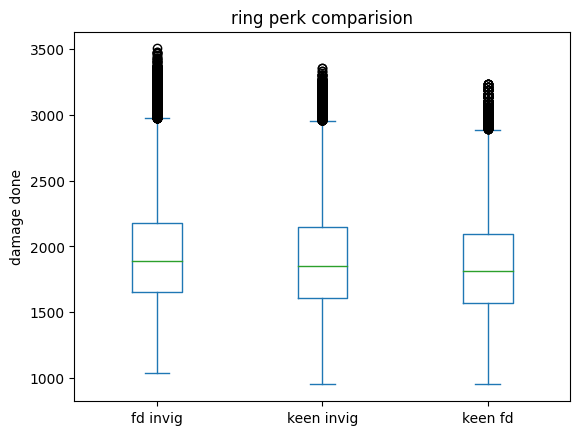

In [18]:
# List of the DataFrames
dataframes_list = [df_fdip,df_keenip,df_keenfd]

# Extract the 'damage' column from each DataFrame and concatenate them into box_df
box_df = pd.concat([df['damage'].dropna() for df in dataframes_list], axis=1)
median = [df['damage'].median() for df in dataframes_list]

# Rename the columns in the new DataFrame
column_names = ['fd invig','keen invig','keen fd']
box_df.columns = column_names

bplt = box_df.plot.box()
bplt.set_ylabel("damage done")
bplt.set_title("ring perk comparision")

base_resil_dmg = min(median)
median_dmg_percent = [round(x/base_resil_dmg,4) for x in median]
median_dmg_percent

In [2]:
import calc_rng_dmg # need to restart kernal if you change amt of resil
import pandas as pd

def get_class_data(nw_class,data_points):
    df_input = [None]*data_points
    for i in range(data_points):
        temp_list = calc_rng_dmg.calc_dmg(nw_class,amt_resil_ui=5,amt_shirking_ui=0,amt_aversion_ui=0)
        df_input[i] = temp_list
    return df_input

meta_ga = get_class_data("med_bruiser_ga",100000)
my_ga = get_class_data("med_bruiser_ga_emp",100000)
meta_wh = get_class_data("med_bruiser_wh_attunement",100000)
my_wh = get_class_data("med_bruiser_wh_shirk",100000)

df_meta_ga = pd.DataFrame(meta_ga,columns=["damage","base damage","crit","crit damage modifier","empower %","dmg absorbed","rend percentage"])
df_my_ga = pd.DataFrame(my_ga,columns=["damage","base damage","crit","crit damage modifier","empower %","dmg absorbed","rend percentage"])
df_meta_wh = pd.DataFrame(meta_wh,columns=["damage","base damage","crit","crit damage modifier","empower %","dmg absorbed","rend percentage"])
df_my_wh = pd.DataFrame(my_wh,columns=["damage","base damage","crit","crit damage modifier","empower %","dmg absorbed","rend percentage"])

In [4]:
print(f"meta ga: {round(df_meta_ga['damage'].mean(),2)} sf median: {df_meta_ga['damage'].median()} standard deviation: {round(df_meta_ga['damage'].std(),2)} max: {df_meta_ga['damage'].max()}")
print(f"my ga: {round(df_my_ga['damage'].mean(),2)} sf median: {df_my_ga['damage'].median()} standard deviation: {round(df_my_ga['damage'].std(),3)} max: {df_my_ga['damage'].max()}")
print(f"meta wh: {round(df_meta_wh['damage'].mean(),2)} sf median: {df_meta_wh['damage'].median()} standard deviation: {round(df_meta_wh['damage'].std(),3)} max: {df_meta_wh['damage'].max()}")
print(f"my wh: {round(df_my_wh['damage'].mean(),2)} sf median: {df_my_wh['damage'].median()} standard deviation: {round(df_my_wh['damage'].std(),3)} max: {df_my_wh['damage'].max()}")

meta ga: 1691.57 sf median: 1666.0 standard deviation: 320.6 max: 2905
my ga: 1901.1 sf median: 1872.0 standard deviation: 338.618 max: 3178
meta wh: 2226.57 sf median: 2232.0 standard deviation: 492.83 max: 3626
my wh: 2416.61 sf median: 2386.0 standard deviation: 553.876 max: 4582


[1.0, 1.1236, 1.3397, 1.4322]

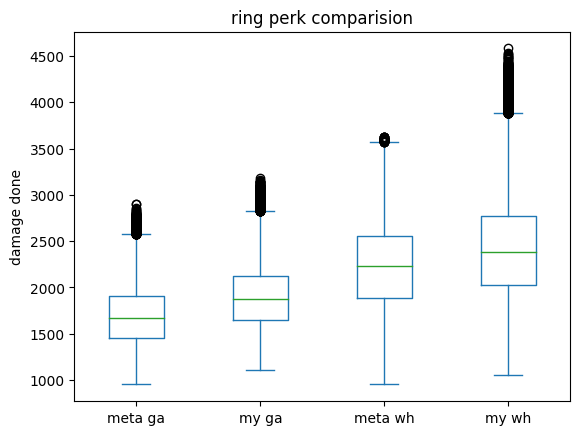

In [5]:
# List of the DataFrames
dataframes_list = [df_meta_ga,df_my_ga,df_meta_wh,df_my_wh]

# Extract the 'damage' column from each DataFrame and concatenate them into box_df
box_df = pd.concat([df['damage'].dropna() for df in dataframes_list], axis=1)
median = [df['damage'].median() for df in dataframes_list]

# Rename the columns in the new DataFrame
column_names = ['meta ga','my ga','meta wh','my wh']
box_df.columns = column_names

bplt = box_df.plot.box()
bplt.set_ylabel("damage done")
bplt.set_title("ring perk comparision")

base_resil_dmg = min(median)
median_dmg_percent = [round(x/base_resil_dmg,4) for x in median]
median_dmg_percent